In [ ]:
#词作者词云绘制

In [3]:
import sqlite3
conn = sqlite3.connect("C:\\Users\\洋子\\Documents\\作业\\大三上\\文本理解与数据挖掘\\第一次作业\\ci.db")
#conn=sqlite3.connect("../data/database/texts.db")
print ('Opened database successfully')

Opened database successfully


In [65]:
c = conn.cursor()
result=[]

cursor = c.execute("SELECT author from ci")
for row in cursor:
    author=""
    for w in row:
        if(w!="'") and (w!=","):
            author=author+w 
    if(author!="无名氏"):
        result.append(author)
print(result[1])

和岘


In [66]:
author=""
for i in result:
    author=author+i+" "
#print(author)

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [68]:
mask=np.array(Image.open("china2.png"))

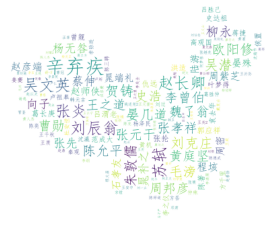

In [69]:
font = r'C:\Windows\Fonts\simfang.ttf'
#wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(text.lower())

wc = WordCloud(
        # 设置字体，不指定就会出现乱码
    font_path=font,
    mask=mask,
    collocations=False,
        # 设置背景色
    background_color='white',
        # 设置背景宽
    width=500,
        # 设置背景高
    height=350,
        # 最大字体
    max_font_size=30,
        # 最小字体
    min_font_size=5,
    mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(author)
# 保存图片
wc.to_file(r"author_for_ci.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

#词牌名词云绘制

In [58]:
c = conn.cursor()
result=[]

cursor = c.execute("SELECT rhythmic from ci")
for row in cursor:
    title=""
    for w in row:
        if(w!="'") and (w!=","):
            title=title+w 
    result.append(title)
print(result[1])

六州


In [59]:
author=""
for i in result:
    author=author+i+" "
#print(author)

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
mask=np.array(Image.open("china2.png"))

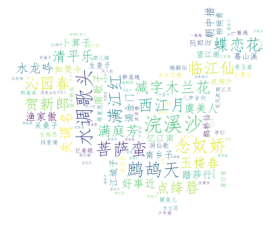

In [63]:
font = r'C:\Windows\Fonts\simfang.ttf'
#wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(text.lower())

wc = WordCloud(
        # 设置字体，不指定就会出现乱码
    font_path=font,
    mask=mask,
    collocations=False,
        # 设置背景色
    background_color='white',
        # 设置背景宽
    width=500,
        # 设置背景高
    height=350,
        # 最大字体
    max_font_size=30,
        # 最小字体
    min_font_size=5,
    mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(author)
# 保存图片
wc.to_file(r"rhythmic_for_ci.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

唐诗作者

In [70]:
import sqlite3
conn = sqlite3.connect("C:\\Users\\洋子\\Documents\\作业\\大三上\\文本理解与数据挖掘\\第一次作业\\poet.db")
#conn=sqlite3.connect("../data/database/texts.db")
print ('Opened database successfully')

Opened database successfully


In [74]:
c = conn.cursor()
result=""

cursor = c.execute("SELECT author from poet")
for row in cursor:
    author=""
    for w in row:
        if(w!="'") and (w!=","):
            author=author+w 
    result=result+" "+author
    #result.append(author)
print(result[1])

KeyboardInterrupt: 

In [73]:
author=""
for i in result:
    author=author+i+" "
#print(author)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
mask=np.array(Image.open("china2.png"))

In [ ]:
font = r'C:\Windows\Fonts\simfang.ttf'
#wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(text.lower())

wc = WordCloud(
        # 设置字体，不指定就会出现乱码
    font_path=font,
    mask=mask,
    collocations=False,
        # 设置背景色
    background_color='white',
        # 设置背景宽
    width=500,
        # 设置背景高
    height=350,
        # 最大字体
    max_font_size=30,
        # 最小字体
    min_font_size=5,
    mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(author)
# 保存图片
wc.to_file(r"author_for_poet.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

词内容

In [75]:
import sqlite3
conn = sqlite3.connect("C:\\Users\\洋子\\Documents\\作业\\大三上\\文本理解与数据挖掘\\第一次作业\\texts.db")
#conn=sqlite3.connect("../data/database/texts.db")
print ('Opened database successfully')

Opened database successfully


In [80]:
c = conn.cursor()
data=[]

cursor = c.execute("SELECT texts from ci")
for row in cursor:
    data.append(row)
#print(type(data[1]))

<class 'tuple'>


In [82]:
import jieba
import numpy as np
import pandas as pd

def fenci(train_data):
    words_df = ' '.join(jieba.cut(str(train_data)))
    return words_df

x_fenci = []
for i in range(len(data)):
    x_fenci.append(fenci(str(data[i])))

x_fenci[:5]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\洋子\AppData\Local\jieba.cache
Loading model cost 1.555 seconds.
Prefix dict has been built successfully.


["( ' 气和玉烛 ， 睿化 著鸿明 。   缇 管 一阳生 。   郊盛礼 燔 柴 毕 ， 旋轸 凤凰 城 。   森罗 仪卫 振华 缨 。   载路溢 欢声 。   皇图 大业 超前 古 ， 垂象 泰阶平 。   岁 时 丰衍 ， 九土 乐升平 。   睹 寰海 澄清 。   道 高 尧舜 垂衣治 ， 日月 并 文明 。   嘉禾 甘露 登歌荐 ， 云物 焕祥经 。   兢兢惕惕 持谦德 ， 未许 禅云亭 。 ' , )",
 "( ' 严 夜警 ， 铜莲漏 迟迟 。   清禁肃 ， 森 陛戟 ， 羽卫 俨 皇闱 。   角声励 ， 钲 鼓攸宜 。   金管 成雅 奏 ， 逐吹 逶迤 。   荐 苍 璧 ， 郊祀 神祗 。   属景 运纯禧 。   京坻 丰衍 ， 群材 乐育 ， 诸侯 述职 ， 盛德 服 蛮夷 。   殊祥萃 ， 九苞丹 凤来仪 。   膏露 降 ， 和 气洽 ， 三秀焕 灵芝 。   鸿猷播 ， 史册 相辉 。   张 四维 。   卜世 永固 丕 基 。   敷玄化 ， 荡荡 无为 。   合 尧舜 文思 。   混 并 寰宇 ， 休牛归马 ， 销金 偃革 ， 蹈咏庆昌期 。 ' , )",
 "( ' 承宝运 ， 驯致 隆平 。   鸿庆 被 寰 瀛 。   时清俗 阜 ， 治定 功成 。   遐迩 咏 由庚 。   严 郊祀 ， 文物 声明 。   会 天正 、 星拱奏 严 更 。   布羽仪 簪缨 。   宸 心 虔洁 ， 明德 播惟馨 。   动 苍冥 。   神降享 精诚 。   燔 柴半 ， 万乘 移天 仗 ， 肃銮 辂 旋衡 。   千官 云拥 ， 群后 葵倾 。   玉帛 旅明庭 。   韶荐 ， 金奏 谐声 。   集休 亨 。   皇泽 浃 黎庶 ， 普率 洽恩荣 。   仰钦元 后 ， 睿 圣贯 三灵 。   万邦 宁 。   景贶 福千龄 。 ' , )",
 "( ' 雨恨云愁 ， 江南 依旧 称 佳丽 。   水村 渔市 。   一缕 孤烟细 。   天际 征鸿 ， 遥 认行 如缀 。   平生 事 。   此时 凝睇 。   谁 会 凭 阑意 。     > >     词牌 介绍 ' , )",
 "( ' 神仙 神仙 瑶池 宴 。   片片 。   碧桃 零落 春风 晚 。   翠云 开处 ， 隐隐 金 

In [88]:
result=""
for i in x_fenci:
    if(i!="介绍")and (i!="词牌"):
        result=result+i+" "
#print(author)

In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
mask=np.array(Image.open("china2.png"))

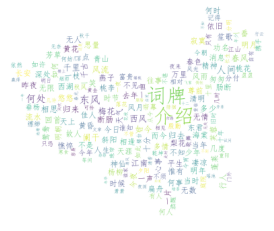

In [90]:
font = r'C:\Windows\Fonts\simfang.ttf'
#wc = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(text.lower())

wc = WordCloud(
        # 设置字体，不指定就会出现乱码
    font_path=font,
    mask=mask,
    collocations=False,
        # 设置背景色
    background_color='white',
        # 设置背景宽
    width=500,
        # 设置背景高
    height=350,
        # 最大字体
    max_font_size=30,
        # 最小字体
    min_font_size=5,
    mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(result)
# 保存图片
wc.to_file(r"text_for_poet.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()